# **Assignment Information**

* **Subject Name:** Machine Learning

* **Subject Code:** CO3117

* **Semester:** 251

* **Academic Year:** 2025

* **Instructor:** Dr. Le Thanh Sach

* **Group Name:** CSML25
| Full Name | Student ID | Email | Division of tasks |
|--------------------|----------|----------------|---------------|
| Nguyen Dang Khanh | 2311512 | khanh.nguyennttt040905@hcmut.edu.vn | EDA, Preprocess, Embedding, Model testing for Traditional Pipeline |
| Bui Ngoc Phuc | 2312665 ​​| phuc.buif2175@hcmut.edu.vn | Preprocess, Embedding, Model testing for DeepLeanring Pipeline |
| Dinh Hoang Chung | 2310359 | chung.dinhhoang@hcmut.edu.vn | Preprocess, Embedding, Model testing for DeepLeanring Pipeline |

# **Assignment 2: Machine learning with text data (Text Data)**
* **Introduction to the dataset**
* Name: Emotions dataset for NLP.

- People always express many different types of emotions/feelings depending on the situation, and they can convey them through facial expressions, voice or in the form of words.
- On social networking platforms such as **Twitter** or **Instagram**, millions of people express their thoughts and opinions every day through comments and posts. These lines of text often contain clear emotions such as *sadness, happiness, joy, anger, fear, surprise,...* that truly reflect the psychological state of the writer.
- Analyzing and classifying emotions from text is not only useful in academic research but also has many practical applications such as:
- Analyzing customer opinions (customer feedback analysis).
- Monitoring public opinion (social media monitoring).
- Detect negative sentiments to support mental health.

- Integrate into intelligent recommendation systems.

- For each given comment/text, we will use natural language processing (NLP) techniques to classify the emotion type of the text.

- Text representation methods such as **Bag of Words**, **n-grams**, **TF-IDF** will be applied to convert text into numbers, then test many different classification algorithms (e.g. Logistic Regression, SVM, Random Forest, or deep learning models such as LSTM, BERT).

- This dataset provides a lightweight testing environment, making it easy to build an NLP pipeline from pre-processing, feature representation to training and evaluating the model, before applying it to larger and more complex datasets.

* Dataset information:

* Total number of samples: about 20,000 text sentences (train + test + valid).

* Number of labels (classes): 6 types of emotions (joy, sadness, anger, fear, love, surprise).

* Data format: Text and emotion labels (categorical).

* Dataset link: [Emotions Dataset for NLP](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data).

* **Problem objectives**
* Understand and apply the traditional machine learning pipeline process, including:
data preprocessing, feature extraction, model training and evaluation.
* EDA analysis report (statistics on number of words, text length distribution, word frequency)
* Practice skills in deploying machine learning models on text data.
* Understand and apply traditional feature extraction methods for text data: Bag-of-Words (BoW), TF-IDF, or n-gram.

* Use deep learning embeddings: Word2Vec, BERT.

* Develop the ability to analyze, compare, and evaluate the effectiveness of machine learning models through measurement indicators.

* Practice programming skills, testing, and organizing scientific reports.

* **Models to be deployed:**

# **Import libraries - Download nessesary package**

In this step, we will install the libraries required for the machine learning pipeline.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
from google.colab import files
!pip install gensim --upgrade-strategy only-if-needed



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 43.4 MB/s eta 0:00:00


# **Download Dataset**

In [ ]:
# path
import kagglehub
import pandas as pd
path = kagglehub.dataset_download('praveengovi/emotions-dataset-for-nlp')
# load 3 set
train = pd.read_csv(f"{path}/train.txt", sep=';', header=None, names=['text', 'emotion'])
val   = pd.read_csv(f"{path}/val.txt",   sep=';', header=None, names=['text', 'emotion'])
test  = pd.read_csv(f"{path}/test.txt",  sep=';', header=None, names=['text', 'emotion'])

# review
print("\n")
print("Train set shape:", train.shape)
print("Sample from train set:")
display(train.head())
print("\n")

print("Test set shape:", test.shape)
print("Sample from test set:")
display(test.head())
print("\n")

print("Validation set shape:", val.shape)
print("Sample from validation set:")
display(val.head())

100%|██████████| 721k/721k [00:00<00:00, 37.9MB/s]

Extracting files...


Train set shape: (16000, 2)
Sample from train set:


,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger




Test set shape: (2000, 2)
Sample from test set:


,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness




Validation set shape: (2000, 2)
Sample from validation set:


,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


# **EDA (Exploratory Data Analysis)**


## Unique value

In [ ]:
# unique
print(train["emotion"].unique())
print("Number of unique labels:", train["emotion"].nunique())
train['emotion'].value_counts()



['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']
Number of unique labels: 6


,count
emotion,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


## Mapping

In [ ]:
# mapping
mapping = {'joy' : 0,
           'sadness' : 1,
           'anger' : 2,
           'fear' : 3,
           'love' : 4,
           'surprise' : 5,
          }
train['label'] = train['emotion'].map(mapping)
val['label'] = val['emotion'].map(mapping)
test['label'] = test['emotion'].map(mapping)
display(train.head())

,text,emotion,label
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2


## Piechart statistics

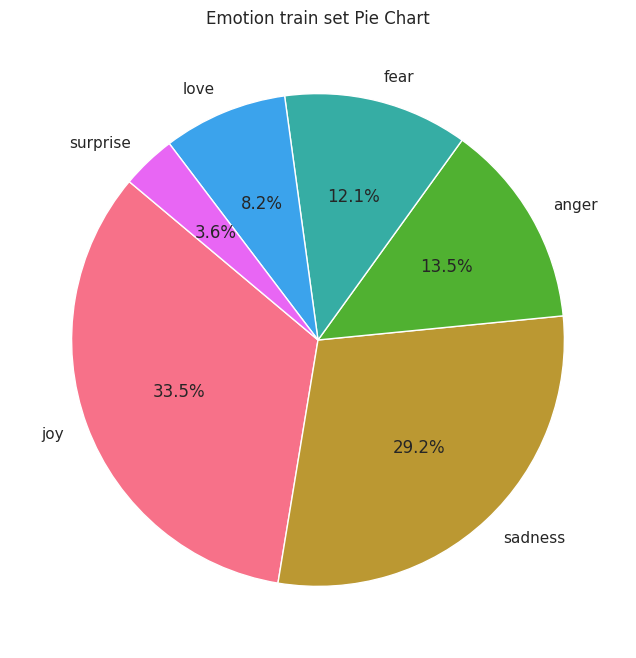

In [ ]:
# pie chart - train
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = train['emotion'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion train set Pie Chart')
plt.show()

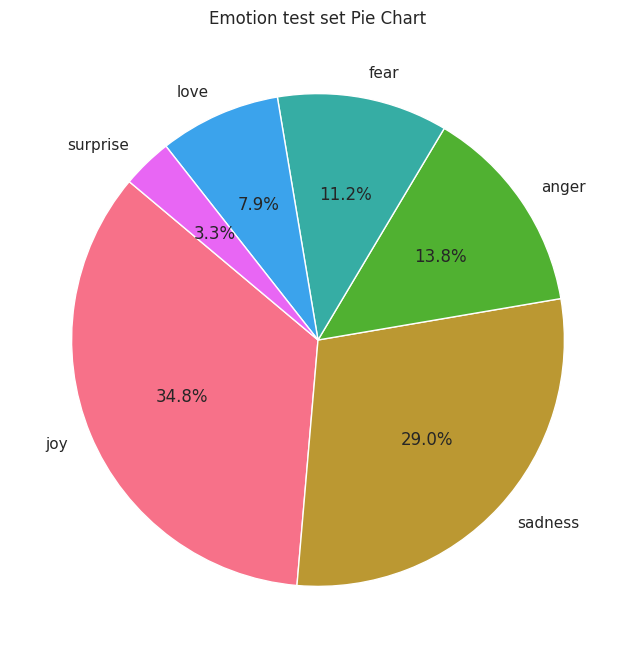

In [ ]:
# pie chart - test
label_counts = test['emotion'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion test set Pie Chart')
plt.show()

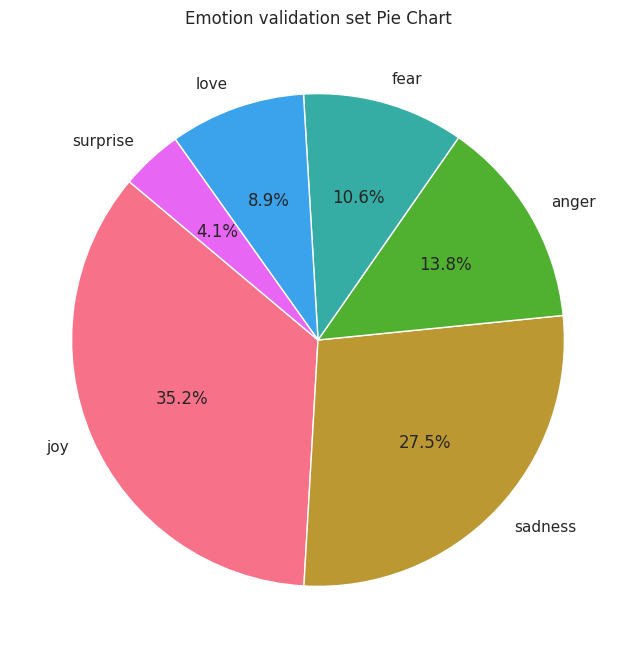

In [ ]:
# pie chart - val
label_counts = val['emotion'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion validation set Pie Chart')
plt.show()

##

## Barchart visualization

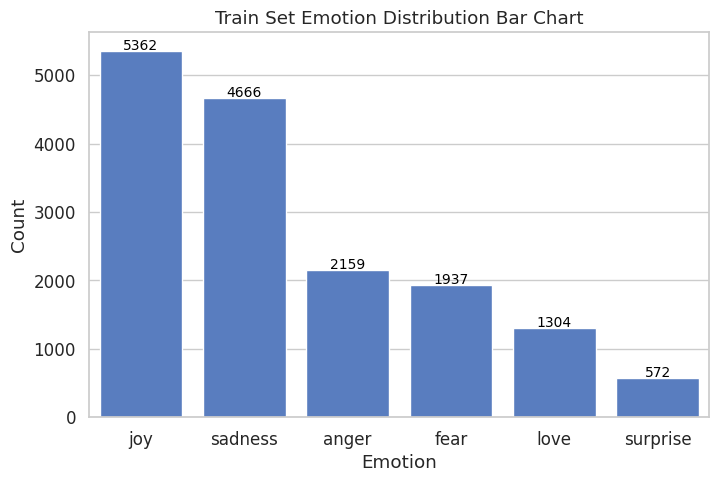

In [ ]:
# bar chart - train
plt.figure(figsize=(8,5))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
ax = sns.countplot(x='emotion', data=train, order=train['emotion'].value_counts().index)
plt.title("Train Set Emotion Distribution Bar Chart")
plt.xlabel("Emotion")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 12,
            f'{int(height)}', ha="center", fontsize=10, color='black')

plt.show()

## Word count statistics

In [ ]:
# thống kê số lượng từ - train
train['word_count'] = train['text'].str.split().str.len()
print("Word Statistics:")
display(train['word_count'].describe().to_frame().T)
print("\nAverage word count per emotion:")
display(train.groupby('emotion')['word_count'].mean().sort_values(ascending=False).to_frame().T)


Word Statistics:


,count,mean,std,min,25%,50%,75%,max
word_count,16000.0,19.166313,10.986905,2.0,11.0,17.0,25.0,66.0



Average word count per emotion:


emotion,love,surprise,joy,anger,fear,sadness
word_count,20.700153,19.97028,19.498135,19.229736,18.844605,18.36198


## Histogram for frequency of word counts

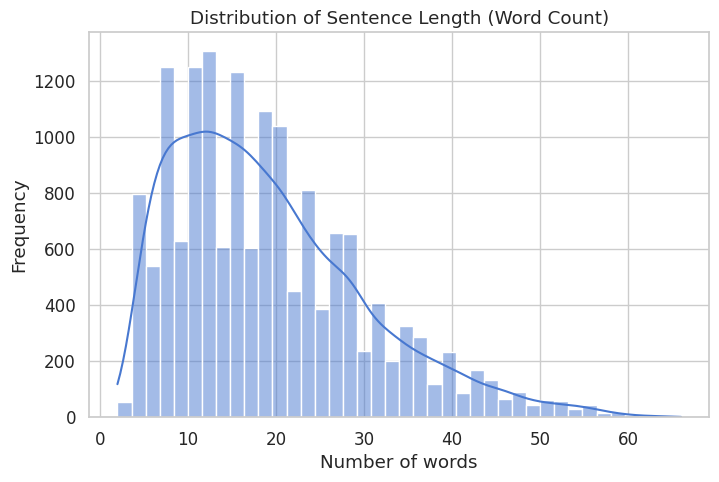

In [ ]:
# Histogram - tần suất của số lượng từ - train
plt.figure(figsize=(8,5))
sns.histplot(train['word_count'], bins=40, kde=True)
plt.title("Distribution of Sentence Length (Word Count)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()



## Boxplot for word counts classified by emotions


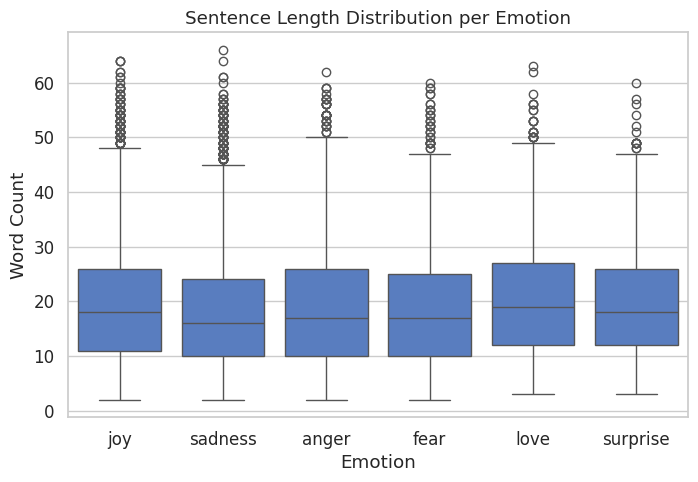

In [ ]:
# Boxplot - độ dài theo emotions - train
# outliners
plt.figure(figsize=(8,5))
sns.boxplot(x='emotion', y='word_count', data=train, order=train['emotion'].value_counts().index)
plt.title("Sentence Length Distribution per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Word Count")
plt.show()


## Top 20 word counts

In [ ]:
from collections import Counter
import re

# top 20 word count
def clean_text(s):
    return re.findall(r'[a-z]+', s.lower())
words = [w for text in train['text'] for w in clean_text(text)]
common = pd.DataFrame(Counter(words).most_common(20), columns=['word', 'count'])
display(common)



,word,count
0,i,25859
1,feel,11183
2,and,9589
3,to,8972
4,the,8370
5,a,6200
6,feeling,5112
7,that,5112
8,of,4990
9,my,4283


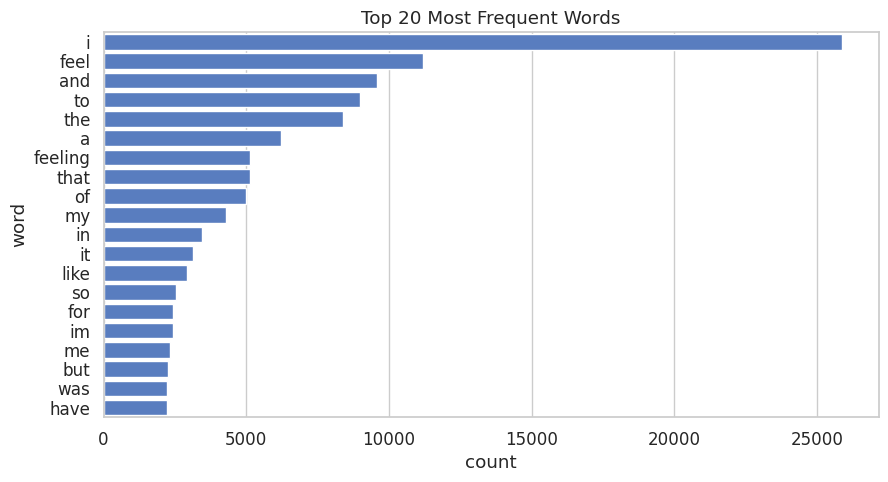

In [ ]:
# top20 word has most fre
plt.figure(figsize=(10, 5))
sns.barplot(data=common, x='count', y='word')
plt.title("Top 20 Most Frequent Words")
plt.show()

## Word Frequency Visualization

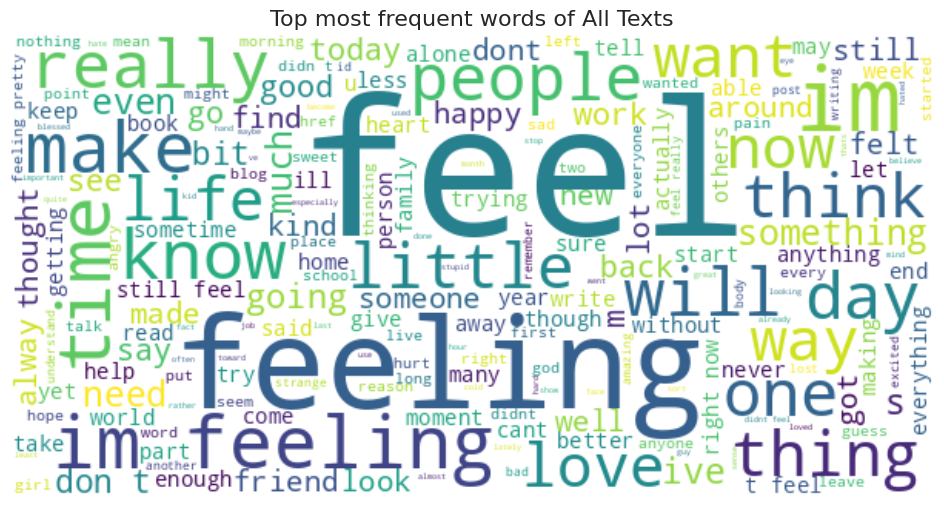

In [ ]:
from wordcloud import WordCloud

# worldcloud for all
all_text = " ".join(train["text"].astype(str))
wordcloud = WordCloud(width=600, height=300, background_color="white").generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top most frequent words of All Texts", fontsize=16)
plt.show()

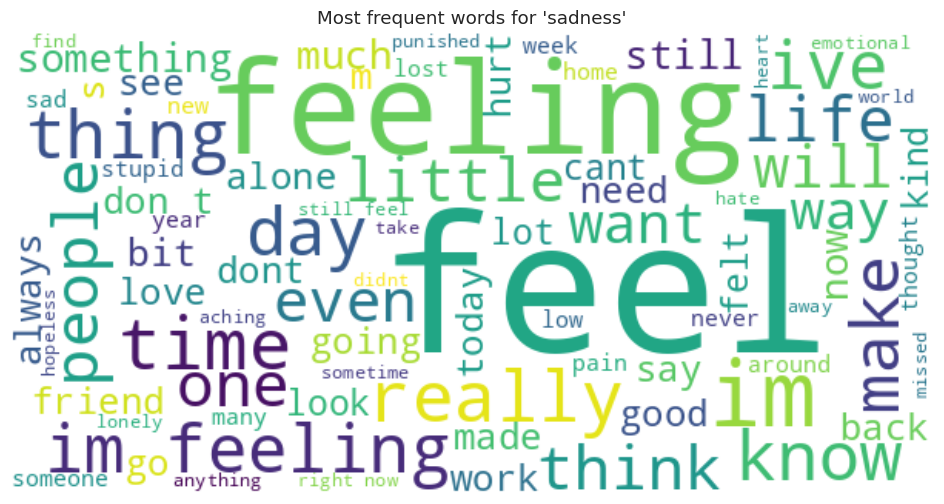

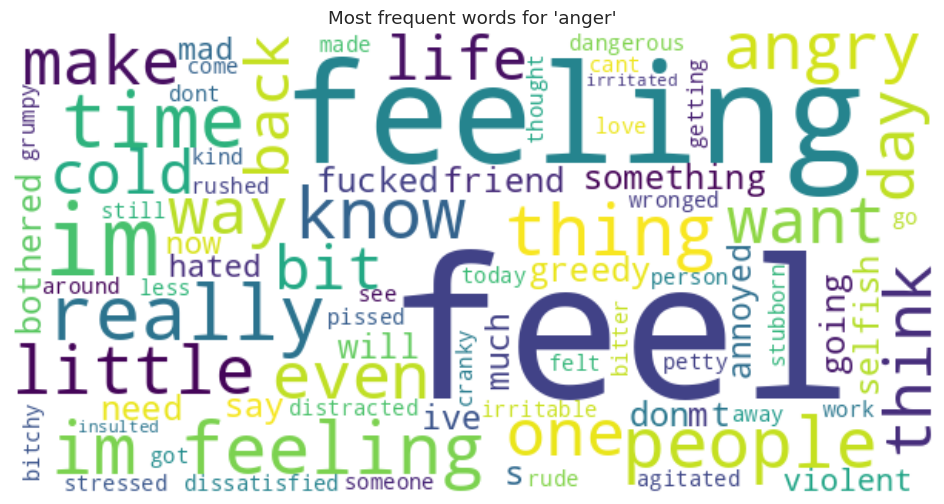

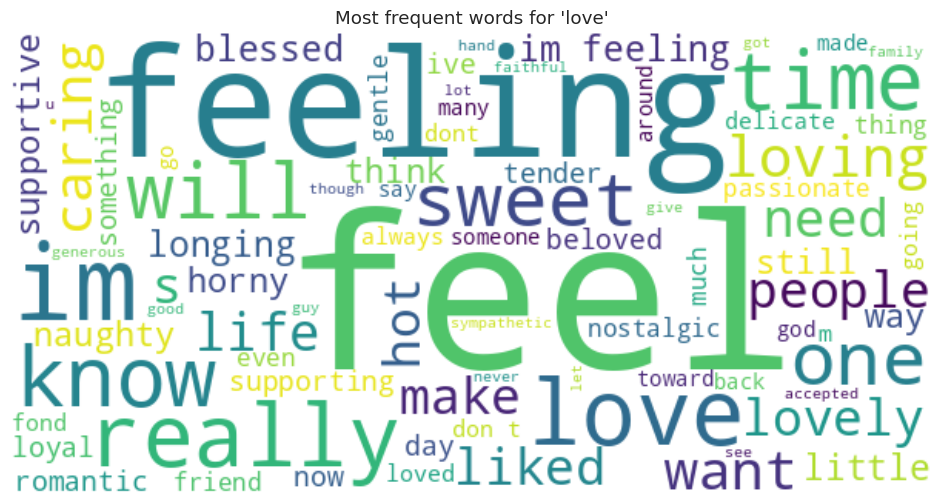

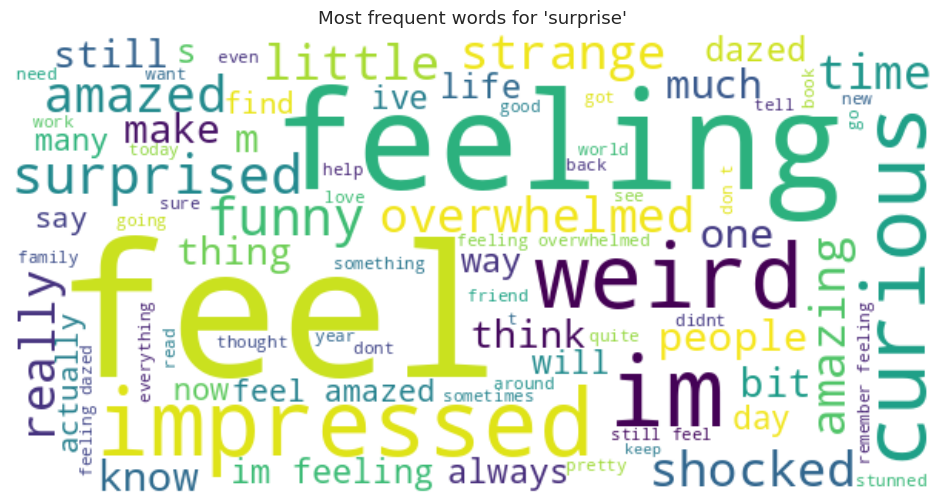

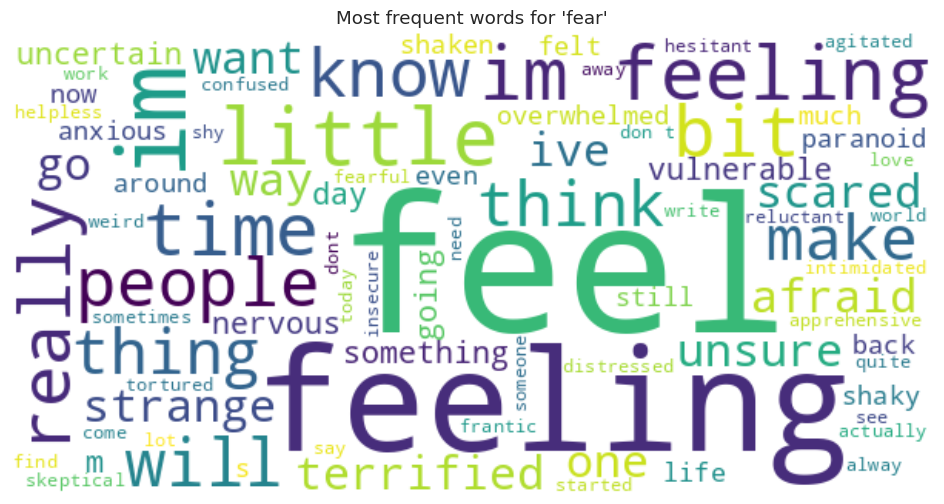

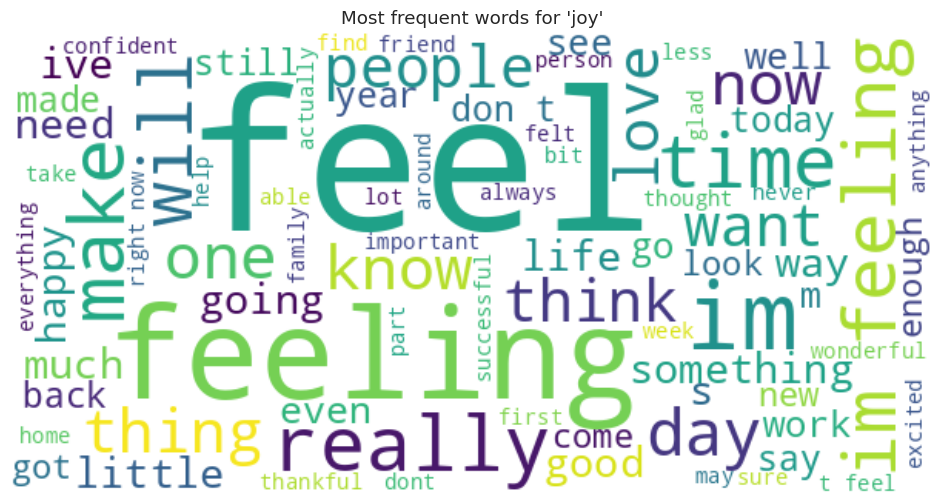

In [ ]:
# Vẽ word cloud cho từng emotion
def clean_text(s):
    return re.findall(r'[a-z]+', s.lower())
emotions = train['emotion'].unique()

for emo in emotions:
    subset = train[train['emotion'] == emo]
    text = ' '.join([' '.join(clean_text(t)) for t in subset['text']])
    wc = WordCloud(width=600, height=300, background_color='white', max_words=80).generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most frequent words for '{emo}'")
    plt.show()


## Check duplicate

In [ ]:
# check duplicate
print("Number of duplicate rows in each split:")
print(f"Train:      {train.duplicated().sum()}")
print(f"Validation: {val.duplicated().sum()}")
print(f"Test:       {test.duplicated().sum()}")
train[train.duplicated()]


Number of duplicate rows in each split:
Train:      1
Validation: 0
Test:       0


,text,emotion,label,word_count
13846,i feel more adventurous willing to take risks ...,joy,0,12


In [ ]:
# delete duplicate - delete same text but label diff
train.drop_duplicates(subset=['text','emotion'], inplace=True)
conflict_texts = train[train.duplicated(subset=['text'], keep=False)]['text'].unique()
train = train[~train['text'].isin(conflict_texts)]
print(train.shape)


(15939, 4)


## Missing value

In [ ]:
# check missing
# train but drop word count col
train_drop = train.drop(columns=['word_count']).copy()

missing_summary = pd.DataFrame({
    'train_missing': train_drop.isna().sum(),
    'test_missing': test.isna().sum(),
    'val_missing': val.isna().sum()
})

display(missing_summary)

,train_missing,test_missing,val_missing
text,0,0,0
emotion,0,0,0
label,0,0,0


# Model without preprocessing - Traditional pipeline

#

## Attempt 1 : No preprocessing, BoW (1–2), No balance, No-CV, Naive Bayes



In [ ]:
# Attempt 1 :
# A1: No preprocessing | BoW (1–2) | No balance | No-CV | Naive Bayes
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

pipe_A1 = Pipeline([
    ("bow", CountVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9)),
    ("clf", MultinomialNB())
])

# Fit trên train
pipe_A1.fit(train["text"], train["label"])

# Đánh giá trên val
val_pred_A1 = pipe_A1.predict(val["text"])
acc_val_A1 = accuracy_score(val["label"], val_pred_A1)
f1_macro_val_A1 = f1_score(val["label"], val_pred_A1, average="macro")
f1_weighted_val_A1 = f1_score(val["label"], val_pred_A1, average="weighted")
result_A1 = pd.DataFrame([{
    'Accuracy': round(acc_val_A1, 3),
    'F1-macro': round(f1_macro_val_A1, 3),
    'F1-weighted': round(f1_weighted_val_A1, 3)
}])

display(result_A1)

,Accuracy,F1-macro,F1-weighted
0,0.773,0.645,0.752


## Attempt 2: NO preprocessing, TF-IDF (1–2), No balance, No-CV, Logistic Regression




In [ ]:
# Attempt 2:
# A2: NO preprocessing | TF-IDF (1–2) | No balance | No-CV | Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

pipe_A2 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, sublinear_tf=True)),
    ("clf", LogisticRegression(max_iter=1000, solver="liblinear"))
])

# Fit trên train
pipe_A2.fit(train["text"], train["label"])

# Đánh giá trên val
val_pred_A2 = pipe_A2.predict(val["text"])
acc_val_A2 = accuracy_score(val["label"], val_pred_A2)
f1_macro_val_A2 = f1_score(val["label"], val_pred_A2, average="macro")
f1_weighted_val_A2 = f1_score(val["label"], val_pred_A2, average="weighted")

result_A2 = pd.DataFrame([{
    'Accuracy': round(acc_val_A2, 3),
    'F1-macro': round(f1_macro_val_A2, 3),
    'F1-weighted': round(f1_weighted_val_A2, 3)
}])

display(result_A2)



,Accuracy,F1-macro,F1-weighted
0,0.808,0.72,0.795


## Attempt 3: No preprocessing, TF-IDF (1–2), No balance, No-CV, Linear SVM


In [ ]:
# A3 : OFF preprocessing | TF-IDF (1–2) | No balance | No-CV | Linear SVM
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

pipe_A3 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, sublinear_tf=True)),
    ("clf", LinearSVC())
])

# Fit trên train
pipe_A3.fit(train["text"], train["label"])

# Đánh giá trên val
val_pred_A3 = pipe_A3.predict(val["text"])
acc_val_A3 = accuracy_score(val["label"], val_pred_A3)
f1_macro_val_A3 = f1_score(val["label"], val_pred_A3, average="macro")
f1_weighted_val_A3 = f1_score(val["label"], val_pred_A3, average="weighted")

result_A3 = pd.DataFrame([{
    'Accuracy': round(acc_val_A3, 3),
    'F1-macro': round(f1_macro_val_A3, 3),
    'F1-weighted': round(f1_weighted_val_A3, 3)
}])

display(result_A3)


,Accuracy,F1-macro,F1-weighted
0,0.897,0.863,0.896


Comments:

- In model 1: BoW only counts frequency, does not consider important words, making the feature noisy. The result shows that although Accuracy is ~0.77, F1-macro is low (0.65) -> the model is biased towards large classes (joy, sadness), and is poor at distinguishing small classes (love, surprise).
- Explanation: Naive Bayes assumes that words are independent, so it is suitable for very separate data, but with emotional texts with many common words (“feel”, “am”), this assumption is wrong -> low performance.
- In model 2: TF-IDF reduces the weight of common words, emphasizes characteristic words → the feature vector is more informative than BoW. Accuracy increases by +3.5%, F1-macro increases by ~0.07 → the model recognizes more evenly between classes.
- Explanation: LR directly optimizes the discriminative model → learns better the relationship between TF-IDF weights and sentiment labels.

- In model 3: Same TF-IDF feature, but SVM maximizes the margin → reduces classification error at the margin. Result: Accuracy ≈ 0.90, F1-macro = 0.863 → very high and close to F1-weighted = 0.896 ⇒ balanced model between classes.

- Explanation: For high-dimensional and sparse-featured text, Linear SVM is the optimal choice — learns strong linear boundaries, better anti-overfitting than LR.

Conclusion:

- In a non-preprocessing pipeline, the choice of feature extraction technique and classification model determines almost all performance. BoW + NB for baseline is simple but weak; TF-IDF + LR improves performance thanks to weighted features; while TF-IDF + SVM achieves the highest performance because of its strong linear boundary learning model, suitable for sparse text data. The obvious improvement of F1-macro shows that the model gradually reduces bias and recognizes even small classes well.

- Moreover, since no preprocessing or cross-validation was applied, the model may overfit to lexical patterns specific to the validation set. Therefore, while the SVM pipeline was retained as the best-performing configuration under the current setup, additional checks on the test set are recommended to verify its generalization ability.

# Model with preprocessing - Traditional pipeline

## Preprocessing

In [ ]:
target_col = 'label'

In [ ]:
# Preprocessor Block (Reusable)
import re, string, numpy as np, pandas as pd

# NLTK resources (chạy 1 lần trong notebook)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
STOP_WORDS = set(stopwords.words('english'))
LEMMATIZER = WordNetLemmatizer()

# --- helpers
def _is_only_mentions(text: str) -> bool:
    return bool(re.fullmatch(r'(@\w+\s*)+', str(text).strip()))

def _clean_text_core(
    text: str,
    remove_numbers=True,
    remove_stopwords=True,
    remove_mentions=True,
    remove_hashtags=True,
    remove_urls=True,
    remove_only_mentions=True,
    lemmatize=True,
    remove_punctuation=True,
    keep_light_punct=True
) -> str:
    if not isinstance(text, str):
        return ""
    if remove_only_mentions and _is_only_mentions(text):
        return ""

    # lowercase
    text = text.lower()

    # remove entities
    if remove_mentions:
        text = re.sub(r'@\w+', ' ', text)
    if remove_hashtags:
        text = re.sub(r'#\w+', ' ', text)
    if remove_urls:
        text = re.sub(r'http\S+|www\.\S+', ' ', text)

    # punctuation / special chars
    if remove_punctuation:
        if keep_light_punct:
            text = re.sub(r'[^\w\s.,!?\'’"-]', ' ', text)  # vẫn giữ .,!?'"-
        else:
            text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

    # numbers
    if remove_numbers:
        text = re.sub(r'\d+', ' ', text)

    # normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # token-level ops
    tokens = text.split()
    if remove_stopwords:
        tokens = [t for t in tokens if t not in STOP_WORDS]
    if lemmatize:
        tokens = [LEMMATIZER.lemmatize(t) for t in tokens if t.isalpha()]

    return " ".join(tokens)

# Dùng khi muốn tạo cột clean_text sẵn (không bắt buộc cho Pipeline)
def apply_preprocessing(
    df: pd.DataFrame,
    text_col: str = "text",
    out_col: str = "clean_text",
    clone: bool = True,
    **kwargs
) -> pd.DataFrame:
    """
    Trả về DataFrame mới (clone) có thêm cột out_col chứa văn bản đã làm sạch.
    Không đụng vào df gốc nếu clone=True.
    """
    data = df.copy(deep=True) if clone else df
    data[out_col] = data[text_col].apply(lambda x: _clean_text_core(x, **kwargs))
    return data

# --- Transformer để dùng trực tiếp trong sklearn Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# CLASS NAME - USE IN PIPELINE
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self,
                 remove_numbers=True,
                 remove_stopwords=True,
                 remove_mentions=True,
                 remove_hashtags=True,
                 remove_urls=True,
                 remove_only_mentions=True,
                 lemmatize=True,
                 remove_punctuation=True,
                 keep_light_punct=True):

        self.remove_numbers = remove_numbers
        self.remove_stopwords = remove_stopwords
        self.remove_mentions = remove_mentions
        self.remove_hashtags = remove_hashtags
        self.remove_urls = remove_urls
        self.remove_only_mentions = remove_only_mentions
        self.lemmatize = lemmatize
        self.remove_punctuation = remove_punctuation
        self.keep_light_punct = keep_light_punct
        self.kw = dict(
            remove_numbers=self.remove_numbers,
            remove_stopwords=self.remove_stopwords,
            remove_mentions=self.remove_mentions,
            remove_hashtags=self.remove_hashtags,
            remove_urls=self.remove_urls,
            remove_only_mentions=self.remove_only_mentions,
            lemmatize=self.lemmatize,
            remove_punctuation=self.remove_punctuation,
            keep_light_punct=self.keep_light_punct
        )

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([_clean_text_core(x, **self.kw) for x in X])



## Embedding - Selection and Save to .npy/.h5 file

In [ ]:
# SAVE EMBEDDINGS LIBRARY (BoW/TF-IDF × uni/bi/tri → .h5 compressed)
import os, json, h5py, numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

os.makedirs("features", exist_ok=True)

MIN_DF = 2
MAX_DF = 0.9

def make_embedder(kind="tfidf", ngram=(1,1)):
    if kind == "bow":
        vect = CountVectorizer(
            ngram_range=ngram,
            lowercase=True,
            min_df=MIN_DF,
            max_df=MAX_DF
        )
    elif kind == "tfidf":
        vect = TfidfVectorizer(
            ngram_range=ngram,
            sublinear_tf=True,
            lowercase=True,
            min_df=MIN_DF,
            max_df=MAX_DF
        )
    else:
        raise ValueError("kind phải là 'bow' hoặc 'tfidf'")
    return Pipeline([("clean", TextCleaner()), ("vect", vect)])

CONFIGS = {
    "bow_uni":   {"kind": "bow",   "ngram": (1,1)},
    "bow_bi":    {"kind": "bow",   "ngram": (1,2)},
    "bow_tri":   {"kind": "bow",   "ngram": (1,3)},
    "tfidf_uni": {"kind": "tfidf", "ngram": (1,1)},
    "tfidf_bi":  {"kind": "tfidf", "ngram": (1,2)},
    "tfidf_tri": {"kind": "tfidf", "ngram": (1,3)},
}

manifest = {}

# Lưu nhãn
np.save("features/y_train.npy", train[target_col].values)
np.save("features/y_val.npy",   val[target_col].values)

for name, cfg in CONFIGS.items():
    print(f"🔹 Handling {name} ...")
    embedder = make_embedder(cfg["kind"], cfg["ngram"])
    embedder.fit(train["text"])
    X_tr = embedder.transform(train["text"]).toarray().astype("float32")
    X_va = embedder.transform(val["text"]).toarray().astype("float32")

    # Lưu vào .h5 (dense float32 + gzip)
    path_h5 = f"features/{name}.h5"
    with h5py.File(path_h5, "w") as f:
        f.create_dataset("X_train", data=X_tr, compression="gzip", chunks=True)
        f.create_dataset("X_val",   data=X_va, compression="gzip", chunks=True)

    manifest[name] = {
        "kind": cfg["kind"],
        "ngram": cfg["ngram"],
        "file_h5": path_h5,
        "labels_train": "features/y_train.npy",
        "labels_val":   "features/y_val.npy"
    }

with open("features/manifest.json", "w", encoding="utf-8") as f:
    json.dump(manifest, f, indent=2, ensure_ascii=False)

print("✅ Save embedding .h5:", ", ".join(manifest.keys()))


🔹 Handling bow_uni ...
🔹 Handling bow_bi ...
🔹 Handling bow_tri ...
🔹 Handling tfidf_uni ...
🔹 Handling tfidf_bi ...
🔹 Handling tfidf_tri ...
✅ Save embedding .h5: bow_uni, bow_bi, bow_tri, tfidf_uni, tfidf_bi, tfidf_tri


SAVE METRICS-FUNCTION FOR OVERALL CONCLUSION

In [ ]:
def log_attempt(name, clf_name, pred, desc=""):
    RESULTS.append({
        "feature_set": name,
        "classifier": clf_name,
        "accuracy": round(accuracy_score(y_val, pred), 4),
        "f1_macro": round(f1_score(y_val, pred, average="macro"), 4),
        "f1_weighted": round(f1_score(y_val, pred, average="weighted"), 4),
        "description": desc
    })
RESULTS = []  # nơi gom tất cả kết quả

Use these embedding files as input for the classification models

## Attempt 4.1: TF-IDF, Unigram, No balance, No-CV, Logistic Regression




In [ ]:
import json, h5py, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

with open("features/manifest.json") as f:
    M = json.load(f)

NAME = "tfidf_uni"

with h5py.File(M[NAME]["file_h5"], "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load(M[NAME]["labels_train"])
y_val   = np.load(M[NAME]["labels_val"])

print(f"{NAME} → Train {X_train.shape}, Val {X_val.shape}")

clf = LogisticRegression(max_iter=1000, solver="lbfgs", random_state=42)
clf.fit(X_train, y_train)

pred = clf.predict(X_val)
acc  = round(accuracy_score(y_val, pred), 3)
f1m  = round(f1_score(y_val, pred, average='macro'), 3)
f1w  = round(f1_score(y_val, pred, average='weighted'), 3)

print("Accuracy    :", acc)
print("F1-macro    :", f1m)
print("F1-weighted :", f1w)


tfidf_uni → Train (15939, 6496), Val (2000, 6496)
Accuracy    : 0.877
F1-macro    : 0.836
F1-weighted : 0.875


In [ ]:
log_attempt(NAME, clf.__class__.__name__, pred,
            desc="TF-IDF, Unigram, No balance, No-CV, Logistic Regression")

## Attempt 4.2: TF-IDF, Bigram, No balance, No-CV, Logistic Regression:




In [ ]:
import h5py, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_bi"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LogisticRegression(max_iter=1000, solver="lbfgs", random_state=42)
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))



Accuracy    : 0.885
F1-macro    : 0.839
F1-weighted : 0.881


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Bigram, No balance, No-CV, Logistic Regression")

## Attempt 4.3: TF-IDF, Trigram, No balance, No-CV, Logistic Regression




In [ ]:
import h5py, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_tri"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LogisticRegression(max_iter=1000, solver="lbfgs", random_state=42)
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.884
F1-macro    : 0.838
F1-weighted : 0.881


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Trigram, No balance, No-CV, Logistic Regression")

## Attempt 5.1: TF-IDF, Unigram, No balance, No-CV, Naive Bayes

In [ ]:
import h5py, numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_uni"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = MultinomialNB()
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.73
F1-macro    : 0.523
F1-weighted : 0.681


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Unigram, No balance, No-CV, Naive Bayes")

## Attempt 5.2: TF-IDF, Bigram, No balance, No-CV, Naive Bayes

In [ ]:
import h5py, numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_bi"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = MultinomialNB()
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.725
F1-macro    : 0.516
F1-weighted : 0.672


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Bigram, No balance, No-CV, Naive Bayes")

## Attempt 5.3: TF-IDF, Trigram, No balance, No-CV, Naive Bayes

In [ ]:
import h5py, numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_tri"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = MultinomialNB()
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.716
F1-macro    : 0.498
F1-weighted : 0.66


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Trigram, No balance, No-CV, Naive Bayes")

## Attempt 6.1: TF-IDF, Unigram, No balance, No-CV, SVM

In [ ]:
import h5py, numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_uni"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LinearSVC()
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.905
F1-macro    : 0.877
F1-weighted : 0.904


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Unigram, No balance, No-CV, Linear SVC")

## Attempt 6.2: TF-IDF, Bigram, No balance, No-CV, SVM

In [ ]:
import h5py, numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_bi"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LinearSVC()
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.911
F1-macro    : 0.88
F1-weighted : 0.911


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Bigram, No balance, No-CV, Linear SVC")

## Attempt 6.3: TF-IDF, Trigram, No balance, No-CV, SVM

In [ ]:
import h5py, numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_tri"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LinearSVC()
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.911
F1-macro    : 0.88
F1-weighted : 0.91


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Trigram, No balance, No-CV, Linear SVC")

## Attempt 7.1: TF-IDF, Unigram , balance(class_weight), No-CV, Logistic Regression

In [ ]:
import h5py, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_uni"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LogisticRegression(max_iter=1000, solver="lbfgs", class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.893
F1-macro    : 0.868
F1-weighted : 0.895


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Unigram , balance(class_weight), No-CV, Logistic Regression")

## Attempt 7.2: TF-IDF, Bigram , balance(class_weight), No-CV, Logistic Regression:

In [ ]:
import h5py, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_bi"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LogisticRegression(max_iter=1000, solver="lbfgs", class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.907
F1-macro    : 0.881
F1-weighted : 0.909


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Bigram , balance(class_weight), No-CV, Logistic Regression")

## Attempt 7.3: TF-IDF, Trigram , balance(class_weight), No-CV, Logistic Regression:

In [ ]:
import h5py, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_tri"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LogisticRegression(max_iter=1000, solver="lbfgs", class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.906
F1-macro    : 0.881
F1-weighted : 0.907


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Trigram , balance(class_weight), No-CV, Logistic Regression")

## Attempt 8.1: TF-IDF, Unigram, balance (sample_weight), No-CV, Naive Bayes

In [ ]:
import h5py, numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_uni"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

classes = np.unique(y_train)
class_w = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_w = dict(zip(classes, class_w))
sample_w = np.vectorize(class_w.get)(y_train)

clf = MultinomialNB()
clf.fit(X_train, y_train, sample_weight=sample_w)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.854
F1-macro    : 0.815
F1-weighted : 0.858


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Unigram, balance (sample_weight), No-CV, Naive Bayes")

## Attempt 8.2: TF-IDF, Bigram, balance (sample_weight), No-CV, Naive Bayes

In [ ]:
import h5py, numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_bi"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

classes = np.unique(y_train)
class_w = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_w = dict(zip(classes, class_w))
sample_w = np.vectorize(class_w.get)(y_train)

clf = MultinomialNB()
clf.fit(X_train, y_train, sample_weight=sample_w)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.858
F1-macro    : 0.819
F1-weighted : 0.862


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Bigram, balance (sample_weight), No-CV, Naive Bayes")

## Attempt 8.3: TF-IDF, Trigram, balance (sample_weight), No-CV, Naive Bayes

In [ ]:
import h5py, numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_tri"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

classes = np.unique(y_train)
class_w = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_w = dict(zip(classes, class_w))
sample_w = np.vectorize(class_w.get)(y_train)

clf = MultinomialNB()
clf.fit(X_train, y_train, sample_weight=sample_w)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.856
F1-macro    : 0.819
F1-weighted : 0.861


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Trigram, balance (sample_weight), No-CV, Naive Bayes")

## Attempt 9.1: TF-IDF, Unigram, balance (class_weight), No-CV, Linear SVM

In [ ]:
import h5py, numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_uni"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LinearSVC(class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.907
F1-macro    : 0.881
F1-weighted : 0.908


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Unigram, balance (class_weight), No-CV, Linear SVC")

## Attempt 9.2: TF-IDF, Bigram, balance (class_weight), No-CV, Linear SVM

In [ ]:
import h5py, numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_bi"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LinearSVC(class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.911
F1-macro    : 0.881
F1-weighted : 0.911


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Bigram, balance (class_weight), No-CV, Linear SVC")

## Attempt 9.3: TF-IDF, Trigram, balance (class_weight), No-CV, Linear SVM

In [ ]:
import h5py, numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

NAME = "tfidf_tri"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = LinearSVC(class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)
val_pred = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred, average='weighted'), 3))


Accuracy    : 0.91
F1-macro    : 0.881
F1-weighted : 0.911


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Trigram, balance (class_weight), No-CV, Linear SVC")

## Attempt 10: TF-IDF, Bigram, No balance, CV (GridSearchCV), Logistic Regression


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe_A10 = Pipeline([
    ("clean", TextCleaner(
        remove_numbers=True, remove_stopwords=True, remove_mentions=True,
        remove_hashtags=True, remove_urls=True, remove_only_mentions=True,
        lemmatize=True, remove_punctuation=True, keep_light_punct=True
    )),
    ("tfidf", TfidfVectorizer(
        ngram_range=(1, 2), sublinear_tf=True, min_df=2, max_df=0.9
    )),
    ("clf", LogisticRegression(max_iter=2000, solver="lbfgs"))
])

param_grid_A10 = {
    "clf__C": [0.25, 0.5, 1.0, 2.0, 4.0],
    "clf__solver": ["liblinear", "lbfgs"],
}

gs_A10 = GridSearchCV(
    pipe_A10, param_grid_A10, scoring="f1_macro", cv=cv, n_jobs=-1, verbose=0
)
gs_A10.fit(train["text"], train[target_col])

print("Best params:", gs_A10.best_params_)
print("Best CV F1-macro:", round(gs_A10.best_score_, 3))

val_pred_A10 = gs_A10.predict(val["text"])
print("Acc:", round(accuracy_score(val[target_col], val_pred_A10), 3))
print("F1-macro:", round(f1_score(val[target_col], val_pred_A10, average="macro"), 3))
print("F1-weighted:", round(f1_score(val[target_col], val_pred_A10, average="weighted"), 3))


Best params: {'clf__C': 4.0, 'clf__solver': 'liblinear'}
Best CV F1-macro: 0.858
Acc: 0.906
F1-macro: 0.874
F1-weighted: 0.905


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred_A10,
            desc="TF-IDF, Bigram, No balance, CV (GridSearchCV), Logistic Regression")

### Tested hyperparameter cases

In [ ]:
def show_gridsearch_results(grid, top_n=10):
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 0)

    results = pd.DataFrame(grid.cv_results_)

    cols = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
    results = results[cols].sort_values(by='rank_test_score')

    print(f"🔹 Top {top_n} parameter sets by rank:")
    display(results.head(top_n))


PRINT ALL Tested hyperparameter function

In [ ]:
show_gridsearch_results(gs_A10)


🔹 Top 10 parameter sets by rank:


,params,mean_test_score,std_test_score,rank_test_score
8,"{'clf__C': 4.0, 'clf__solver': 'liblinear'}",0.858266,0.000727,1
9,"{'clf__C': 4.0, 'clf__solver': 'lbfgs'}",0.855877,0.004068,2
7,"{'clf__C': 2.0, 'clf__solver': 'lbfgs'}",0.842210,0.004089,3
6,"{'clf__C': 2.0, 'clf__solver': 'liblinear'}",0.838622,0.005234,4
5,"{'clf__C': 1.0, 'clf__solver': 'lbfgs'}",0.805464,0.006338,5
4,"{'clf__C': 1.0, 'clf__solver': 'liblinear'}",0.794657,0.004533,6
3,"{'clf__C': 0.5, 'clf__solver': 'lbfgs'}",0.724688,0.007153,7
2,"{'clf__C': 0.5, 'clf__solver': 'liblinear'}",0.687137,0.007344,8
1,"{'clf__C': 0.25, 'clf__solver': 'lbfgs'}",0.573818,0.011379,9
0,"{'clf__C': 0.25, 'clf__solver': 'liblinear'}",0.512159,0.009587,10


## Attempt 11: TF-IDF, Bigram, No balance, CV(GridSearchCV), Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

pipe_A11 = Pipeline([
    ("clean", TextCleaner(
        remove_numbers=True, remove_stopwords=True, remove_mentions=True,
        remove_hashtags=True, remove_urls=True, remove_only_mentions=True,
        lemmatize=True, remove_punctuation=True, keep_light_punct=True
    )),
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), sublinear_tf=True, min_df=2, max_df=0.9)),
    ("clf", MultinomialNB())
])

param_A11 = {
    "clf__alpha": [0.1, 0.5, 1.0, 2.0],
    "clf__fit_prior": [True, False],
}
grid_A11 = GridSearchCV(pipe_A11, param_grid=param_A11, scoring="f1_macro", cv=3, n_jobs=-1, verbose=1)
grid_A11.fit(train["text"], train[target_col])

print("Best params:", grid_A11.best_params_, "| CV best macro-F1:", round(grid_A11.best_score_, 4))

val_pred = grid_A11.best_estimator_.predict(val["text"])
print("Acc=", round(accuracy_score(val[target_col], val_pred), 3),
      "\nF1-macro=", round(f1_score(val[target_col], val_pred, average="macro"), 3),
      "\nF1-weighted=", round(f1_score(val[target_col], val_pred, average="weighted"), 3))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params: {'clf__alpha': 0.5, 'clf__fit_prior': False} | CV best macro-F1: 0.7938
Acc= 0.861 
F1-macro= 0.809 
F1-weighted= 0.858


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Bigram, No balance, CV (GridSearchCV), Naive Bayes")

### Tested hyperparameter cases

In [ ]:
show_gridsearch_results(grid_A11)


🔹 Top 10 parameter sets by rank:


,params,mean_test_score,std_test_score,rank_test_score
3,"{'clf__alpha': 0.5, 'clf__fit_prior': False}",0.793802,0.002465,1
1,"{'clf__alpha': 0.1, 'clf__fit_prior': False}",0.773671,0.002507,2
5,"{'clf__alpha': 1.0, 'clf__fit_prior': False}",0.752768,0.002027,3
0,"{'clf__alpha': 0.1, 'clf__fit_prior': True}",0.731471,0.005257,4
7,"{'clf__alpha': 2.0, 'clf__fit_prior': False}",0.686095,0.004110,5
2,"{'clf__alpha': 0.5, 'clf__fit_prior': True}",0.598732,0.003159,6
4,"{'clf__alpha': 1.0, 'clf__fit_prior': True}",0.488910,0.004893,7
6,"{'clf__alpha': 2.0, 'clf__fit_prior': True}",0.382970,0.012371,8


## Attempt 12: TF-IDF, Bigram, No balance, CV(GridSearchCV), SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

pipe_A12 = Pipeline([
    ("clean", TextCleaner(
        remove_numbers=True, remove_stopwords=True, remove_mentions=True,
        remove_hashtags=True, remove_urls=True, remove_only_mentions=True,
        lemmatize=True, remove_punctuation=True, keep_light_punct=True
    )),
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), sublinear_tf=True, min_df=2, max_df=0.9)),
    ("clf", LinearSVC())
])

param_A12 = {
    "clf__C": [0.5, 1, 2, 5],
    "clf__loss": ["hinge", "squared_hinge"],
    "clf__max_iter": [5000],
}
grid_A12 = GridSearchCV(pipe_A12, param_grid=param_A12, scoring="f1_macro", cv=3, n_jobs=-1, verbose=1)
grid_A12.fit(train["text"], train[target_col])

print("Best params:", grid_A12.best_params_, "| CV best macro-F1:", round(grid_A12.best_score_, 4))

val_pred = grid_A12.best_estimator_.predict(val["text"])
print("Acc=", round(accuracy_score(val[target_col], val_pred), 3),
      "\nF1-macro=", round(f1_score(val[target_col], val_pred, average="macro"), 3),
      "\nF1-weighted=", round(f1_score(val[target_col], val_pred, average="weighted"), 3))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params: {'clf__C': 1, 'clf__loss': 'hinge', 'clf__max_iter': 5000} | CV best macro-F1: 0.87
Acc= 0.907 
F1-macro= 0.877 
F1-weighted= 0.906


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Bigram, No balance, CV (GridSearchCV), LinearSVC")

### Tested hyperparameter cases

In [ ]:
show_gridsearch_results(grid_A12)


🔹 Top 10 parameter sets by rank:


,params,mean_test_score,std_test_score,rank_test_score
2,"{'clf__C': 1, 'clf__loss': 'hinge', 'clf__max_iter': 5000}",0.869991,0.005179,1
4,"{'clf__C': 2, 'clf__loss': 'hinge', 'clf__max_iter': 5000}",0.867190,0.004849,2
3,"{'clf__C': 1, 'clf__loss': 'squared_hinge', 'clf__max_iter': 5000}",0.866729,0.002535,3
0,"{'clf__C': 0.5, 'clf__loss': 'hinge', 'clf__max_iter': 5000}",0.866720,0.005274,4
1,"{'clf__C': 0.5, 'clf__loss': 'squared_hinge', 'clf__max_iter': 5000}",0.866177,0.003287,5
5,"{'clf__C': 2, 'clf__loss': 'squared_hinge', 'clf__max_iter': 5000}",0.863052,0.001374,6
7,"{'clf__C': 5, 'clf__loss': 'squared_hinge', 'clf__max_iter': 5000}",0.859950,0.002781,7
6,"{'clf__C': 5, 'clf__loss': 'hinge', 'clf__max_iter': 5000}",0.857143,0.004917,8


## Attempt 13: TF-IDF, Bigram, balance(class_weight), CV(GridSearchCV), SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

pipe_A13 = Pipeline([
    ("clean", TextCleaner(
        remove_numbers=True, remove_stopwords=True, remove_mentions=True,
        remove_hashtags=True, remove_urls=True, remove_only_mentions=True,
        lemmatize=True, remove_punctuation=True, keep_light_punct=True
    )),
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), sublinear_tf=True, min_df=2, max_df=0.9)),
    ("clf", LinearSVC(class_weight="balanced"))
])

param_A13 = {
    "clf__C": [0.5, 1, 2, 5],
    "clf__loss": ["hinge", "squared_hinge"],
    "clf__max_iter": [5000],
}

grid_A13 = GridSearchCV(
    pipe_A13,
    param_grid=param_A13,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_A13.fit(train["text"], train[target_col])

print("Best params:", grid_A13.best_params_, "| CV best macro-F1:", round(grid_A13.best_score_, 4))

val_pred = grid_A13.best_estimator_.predict(val["text"])
print("Acc=", round(accuracy_score(val[target_col], val_pred), 3),
      "\nF1-macro=", round(f1_score(val[target_col], val_pred, average="macro"), 3),
      "\nF1-weighted=", round(f1_score(val[target_col], val_pred, average="weighted"), 3))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params: {'clf__C': 1, 'clf__loss': 'hinge', 'clf__max_iter': 5000} | CV best macro-F1: 0.8757
Acc= 0.909 
F1-macro= 0.88 
F1-weighted= 0.91


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred,
            desc="TF-IDF, Bigram, balance(class_weight), CV (GridSearchCV), LinearSVC")

Comment:

When combining both balance and CV, we see that the model accuracy increases slightly. The reason for choosing A13 as an extension of A12 is because A12 has the highest F1-score.

### Tested hyperparameter cases

In [ ]:
show_gridsearch_results(grid_A13)


🔹 Top 10 parameter sets by rank:


,params,mean_test_score,std_test_score,rank_test_score
2,"{'clf__C': 1, 'clf__loss': 'hinge', 'clf__max_iter': 5000}",0.875719,0.004258,1
1,"{'clf__C': 0.5, 'clf__loss': 'squared_hinge', 'clf__max_iter': 5000}",0.875337,0.003103,2
3,"{'clf__C': 1, 'clf__loss': 'squared_hinge', 'clf__max_iter': 5000}",0.873999,0.003327,3
0,"{'clf__C': 0.5, 'clf__loss': 'hinge', 'clf__max_iter': 5000}",0.872561,0.004783,4
4,"{'clf__C': 2, 'clf__loss': 'hinge', 'clf__max_iter': 5000}",0.870067,0.004707,5
5,"{'clf__C': 2, 'clf__loss': 'squared_hinge', 'clf__max_iter': 5000}",0.868738,0.001838,6
7,"{'clf__C': 5, 'clf__loss': 'squared_hinge', 'clf__max_iter': 5000}",0.861673,0.002479,7
6,"{'clf__C': 5, 'clf__loss': 'hinge', 'clf__max_iter': 5000}",0.858899,0.006238,8


## Attempt 14: BoW, Bigram, No balance, No-CV, Naive Bayes

In [ ]:
import h5py, numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

NAME = "bow_bi"

with h5py.File(f"features/{NAME}.h5", "r") as f:
    X_train = f["X_train"][:]
    X_val   = f["X_val"][:]

y_train = np.load("features/y_train.npy")
y_val   = np.load("features/y_val.npy")

clf = MultinomialNB()
clf.fit(X_train, y_train)
val_pred_A14 = clf.predict(X_val)

print("Accuracy    :", round(accuracy_score(y_val, val_pred_A14), 3))
print("F1-macro    :", round(f1_score(y_val, val_pred_A14, average='macro'), 3))
print("F1-weighted :", round(f1_score(y_val, val_pred_A14, average='weighted'), 3))


Accuracy    : 0.846
F1-macro    : 0.766
F1-weighted : 0.836


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred_A14,
            desc="BoW, Bigram, No balance, No-CV, Naive Bayes")

## Attempt 15: BoW, Bigram, Balance(class_weight), CV (GridSearchCV), Logistic Regression

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe_A15 = Pipeline([
    ("clean", TextCleaner()),
    ("bow", CountVectorizer(
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.9,
        max_features=30000
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        solver="lbfgs",
        class_weight="balanced"
    ))
])

param_grid_A15 = {
    "clf__C": [0.5, 1.0, 2.0],
    "clf__solver": ["lbfgs", "liblinear"],
}

gs_A15 = GridSearchCV(
    pipe_A15,
    param_grid=param_grid_A15,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Train và đánh giá
gs_A15.fit(train["text"], train[target_col])

print("Best params:", gs_A15.best_params_)
print("Best CV F1-macro:", round(gs_A15.best_score_, 3))

val_pred_A15 = gs_A15.best_estimator_.predict(val["text"])

print("Accuracy    :", round(accuracy_score(val[target_col], val_pred_A15), 3))
print("F1-macro    :", round(f1_score(val[target_col], val_pred_A15, average='macro'), 3))
print("F1-weighted :", round(f1_score(val[target_col], val_pred_A15, average='weighted'), 3))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params: {'clf__C': 1.0, 'clf__solver': 'liblinear'}
Best CV F1-macro: 0.875
Accuracy    : 0.908
F1-macro    : 0.88
F1-weighted : 0.909


In [ ]:
log_attempt(NAME, clf.__class__.__name__, val_pred_A15,
            desc="BoW, Bigram, Balance(class_weight), CV (GridSearchCV), Logistic Regression")

### Tested hyperparameter cases

In [ ]:
show_gridsearch_results(gs_A15)


🔹 Top 10 parameter sets by rank:


,params,mean_test_score,std_test_score,rank_test_score
3,"{'clf__C': 1.0, 'clf__solver': 'liblinear'}",0.875127,0.007704,1
5,"{'clf__C': 2.0, 'clf__solver': 'liblinear'}",0.874917,0.007506,2
1,"{'clf__C': 0.5, 'clf__solver': 'liblinear'}",0.873038,0.009016,3
2,"{'clf__C': 1.0, 'clf__solver': 'lbfgs'}",0.872240,0.007935,4
4,"{'clf__C': 2.0, 'clf__solver': 'lbfgs'}",0.871618,0.007741,5
0,"{'clf__C': 0.5, 'clf__solver': 'lbfgs'}",0.870687,0.008880,6


## Overall Comparison

In [ ]:
df = pd.DataFrame(RESULTS).sort_values(["f1_macro","accuracy"], ascending=False).reset_index(drop=True)
display(df)


,feature_set,classifier,accuracy,f1_macro,f1_weighted,description
0,tfidf_uni,LinearSVC,0.9075,0.8814,0.9081,"TF-IDF, Unigram, balance (class_weight), No-CV, Linear SVC"
1,tfidf_bi,LinearSVC,0.9110,0.8810,0.9114,"TF-IDF, Bigram, balance (class_weight), No-CV, Linear SVC"
2,tfidf_bi,LogisticRegression,0.9075,0.8809,0.9089,"TF-IDF, Bigram , balance(class_weight), No-CV, Logistic Regression"
3,tfidf_tri,LinearSVC,0.9105,0.8806,0.9109,"TF-IDF, Trigram, balance (class_weight), No-CV, Linear SVC"
4,tfidf_tri,LogisticRegression,0.9060,0.8806,0.9074,"TF-IDF, Trigram , balance(class_weight), No-CV, Logistic Regression"
5,tfidf_bi,LinearSVC,0.9115,0.8804,0.9110,"TF-IDF, Bigram, No balance, No-CV, Linear SVC"
6,tfidf_tri,LinearSVC,0.9110,0.8797,0.9104,"TF-IDF, Trigram, No balance, No-CV, Linear SVC"
7,tfidf_tri,LinearSVC,0.9090,0.8797,0.9101,"TF-IDF, Bigram, balance(class_weight), CV (GridSearchCV), LinearSVC"
8,bow_bi,MultinomialNB,0.9085,0.8796,0.9090,"BoW, Bigram, Balance(class_weight), CV (GridSearchCV), Logistic Regression"
9,tfidf_uni,LinearSVC,0.9050,0.8770,0.9044,"TF-IDF, Unigram, No balance, No-CV, Linear SVC"


# Download embedding .h5/.npy files (Only use 1 time)

In [ ]:
!zip -r features.zip features
files.download("features.zip")


  adding: features/ (stored 0%)
  adding: features/tfidf_uni.h5 (deflated 20%)
  adding: features/bow_tri.h5 (deflated 50%)
  adding: features/manifest.json (deflated 85%)
  adding: features/y_val.npy (deflated 92%)
  adding: features/bow_uni.h5 (deflated 36%)
  adding: features/y_train.npy (deflated 93%)
  adding: features/bow_bi.h5 (deflated 49%)
  adding: features/tfidf_tri.h5 (deflated 34%)
  adding: features/tfidf_bi.h5 (deflated 32%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Deep learning pipeline

## Utility functions

In [ ]:
def load_embedding_model(model_name):
  model = None
  if model_name == 'word2vec':
    return api.load("glove-wiki-gigaword-300")
  elif model_name == 'glove':
    return api.load('glove-wiki-gigaword-300')
  elif model_name == 'bert':
    from sentence_transformers import SentenceTransformer
    return SentenceTransformer('sentence-transformers/average_word_embeddings_glove.6B.300d')
  else:
    raise ValueError("Invalid model_name")

## Configuration

In [ ]:
max_words = 10000
max_len = 100
load_pretrained = True
embedding_model = 'word2vec'
embedding_dim = 300
epochs = 10

## Tokenization

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Extract data from sets
texts_train = train['text'].values
labels_train = train['emotion'].values
texts_val = val['text'].values
labels_val = val['emotion'].values
texts_test = test['text'].values
labels_test = test['emotion'].values

# Encode labels
label_encoder = LabelEncoder()
labels_all = np.concatenate([labels_train, labels_val, labels_test])
label_encoder.fit(labels_all)

y_train = label_encoder.transform(labels_train)
y_val = label_encoder.transform(labels_val)
y_test = label_encoder.transform(labels_test)

# Tokenizer và padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

texts_all = np.concatenate([texts_train, texts_val, texts_test])
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts_all)
sequences = tokenizer.texts_to_sequences(texts_all)
word_index = tokenizer.word_index

X_train = pad_sequences(tokenizer.texts_to_sequences(texts_train), maxlen=max_len)
X_val = pad_sequences(tokenizer.texts_to_sequences(texts_val), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(texts_test), maxlen=max_len)

## Load pretrained embeddings [Optional]

In [ ]:
import gensim.downloader as api

if load_pretrained == True:
  embedding_matrix = np.zeros((max_words, embedding_dim))
  model = load_embedding_model(embedding_model)
  for word, i in word_index.items():
      if i >= max_words:
          continue
      if word in model:
          embedding_matrix[i] = model[word]

[==================================================] 100.0% 376.1/376.1MB downloaded


## Build and Train CNN Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout

# Xây dựng CNN model để trích xuất embedding
input_layer = Input(shape=(max_len,))
if load_pretrained == False:
  embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)(input_layer)
else:
  embedding_layer = Embedding(input_dim=max_words, weights=[embedding_matrix], output_dim=embedding_dim, input_length=max_len, trainable=False)(input_layer)
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
dense_layer = Dense(64, activation='relu')(pooling_layer)
dropout_layer = Dropout(0.5)(dense_layer)

# Đây là lớp output nếu muốn train CNN: dùng để huấn luyện mô CNN (không lấy output này cho RF)
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(dropout_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện CNN như bình thường
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val, y_val))

# Tạo model lấy embedding (lớp dropout_layer là embedding vector)
embedding_model = Model(inputs=input_layer, outputs=dropout_layer)

# Lấy embedding feature cho train/val/test
X_train_embed = embedding_model.predict(X_train)
X_val_embed = embedding_model.predict(X_val)
X_test_embed = embedding_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.4830 - loss: 1.3697 - val_accuracy: 0.7905 - val_loss: 0.5678
Epoch 2/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.7993 - loss: 0.5790 - val_accuracy: 0.8620 - val_loss: 0.3838
Epoch 3/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8743 - loss: 0.3566 - val_accuracy: 0.8700 - val_loss: 0.3516
Epoch 4/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9086 - loss: 0.2618 - val_accuracy: 0.8765 - val_loss: 0.3655
Epoch 5/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9139 - loss: 0.2409 - val_accuracy: 0.8920 - val_loss: 0.3203
Epoch 6/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9482 - loss: 0.1494 - val_accuracy: 0.8920 - val_loss: 0.3247
Epoch 7/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9490 - loss: 0.1417 - val_accuracy: 0.8805 - val_loss: 0.3798
Epoch 8/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9666 - loss: 0.1005 - 

In [ ]:
import os
import numpy as np

# Tạo thư mục nếu chưa tồn tại
os.makedirs("embeddings", exist_ok=True)

# Sau đó mới lưu file
np.save("embeddings/X_train_embed.npy", X_train_embed)
np.save("embeddings/y_train.npy", y_train)

np.save("embeddings/X_val_embed.npy", X_val_embed)
np.save("embeddings/y_val.npy", y_val)

np.save("embeddings/X_test_embed.npy", X_test_embed)
np.save("embeddings/y_test.npy", y_test)

# Lưu cả danh sách nhãn (class names)
np.save("embeddings/classes.npy", label_encoder.classes_)
print("Saved embeddings to .npy files in folder 'embeddings/'")


Saved embeddings to .npy files in folder 'embeddings/'


## Evaluation on different algorithms

In [ ]:
from sklearn.metrics import confusion_matrix

# Huấn luyện Random Forest sử dụng embedding của CNN
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_embed, y_train)

# Đánh giá mô hình Random Forest trên test set
y_test_pred = rf_clf.predict(X_test_embed)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[240  10   4   1  19   1]
 [  7 186   1   0  12  18]
 [  4   0 645  31  10   5]
 [  2   0  41 112   4   0]
 [ 11  10  17   0 543   0]
 [  1   7   8   0   2  48]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       275
           1       0.87      0.83      0.85       224
           2       0.90      0.93      0.91       695
           3       0.78      0.70      0.74       159
           4       0.92      0.93      0.93       581
           5       0.67      0.73      0.70        66

    accuracy                           0.89      2000
   macro avg       0.84      0.83      0.84      2000
weighted avg       0.89      0.89      0.89      2000

